In [1]:
import collocode
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import iv, kv

In [2]:
solver0 = collocode.CollocationODEFixedStepSolver(n=10, chtype=1)

In [3]:
solver = collocode.CollocationODESolver(n=4, chtype=1, adapative=True)

In [4]:
def bessel_ode(x):
    return x, 1, -1

In [5]:
sol = solver(bessel_ode, [1, 1], domain = [0, 1])

In [6]:
sol.coef.shape

(10,)

In [7]:
np.log10(sol.error)

-16.41511841475372

In [8]:
def iv_fit(x, v):
    return iv(v, 2.*np.sqrt((x+1)/2.))

def iv_fit_2(x, v):
    return iv(v, 2.*np.sqrt(x))

In [9]:
interp = collocode.CollocationAlgebra(6)

In [10]:
sol2 = interp(iv_fit_2, args=(0,), domain = [0, 1])

In [3]:
import spherical

In [47]:
wigner = spherical.Wigner(100)

In [48]:
import quaternionic

In [49]:
R = quaternionic.array.from_spherical_coordinates(0.5, 0.)

In [52]:
%timeit wigner.sYlm(-2, R)[wigner.Yindex(100, 2)]

1.56 ms ± 68.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


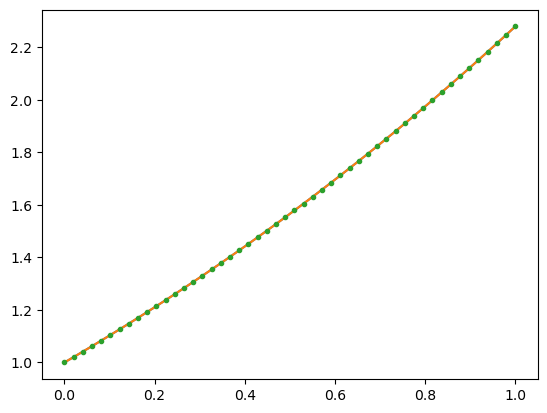

In [11]:
plt.plot(np.linspace(0, 1), sol(np.linspace(0, 1)))
plt.plot(np.linspace(0, 1), sol2(np.linspace(0, 1)))
plt.plot(np.linspace(0, 1), iv(0, 2*np.sqrt(np.linspace(0, 1))), '.')
# plt.plot(np.linspace(0, 1), kv(0, 2*np.sqrt(np.linspace(0, 1))), '.')
plt.show()

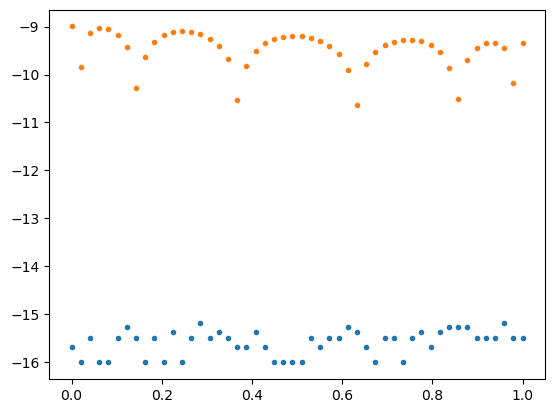

In [12]:
plt.plot(np.linspace(0, 1), np.log10(1e-16 + np.abs(1-sol(np.linspace(0, 1))/iv(0, 2*np.sqrt(np.linspace(0, 1))))), '.')
plt.plot(np.linspace(0, 1), np.log10(1e-16 + np.abs(1-sol2(np.linspace(0, 1))/iv(0, 2*np.sqrt(np.linspace(0, 1))))), '.')
plt.show()

In [1]:
import collocode
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ex_ode(x):
    return [(1-x**2)**2, -2*(1-x**2)*(2 - x - 2.*x**2), 2*(1+x**2)]
def ex_sol(x):
    return 0.5*np.exp(-4.*(1-x))*(1 - x**2)
def ex_sol_deriv(x):
    return np.exp(-4.*(1-x))*(2 - x - 2*x**2)
def ex_sol_deriv2(x):
    return np.exp(-4.*(1-x))*(7 - 8*x - 8*x**2)
def ex_sol_deriv3(x):
    return np.exp(-4.*(1-x))*(20 - 3*16*x - 2*16*x**2)

In [9]:
solver3 = collocode.CollocationODEFixedStepSolver(n=24, chtype=1)
solver4 = collocode.CollocationODEMultiDomainFixedStepSolver(n=10, chtype=1)
solver5 = collocode.CollocationODEFixedMultiDomainFixedStepSolver(n=16, chtype=1)

In [12]:
solex = solver3(ex_ode, [0, -1], domain = [1,-1])
solex2 = solver4(ex_ode, [0, -1], domain = [1, -1], subdomains = 4, tol = 1e-14)
solex3 = solver5(ex_ode, [0, -1], domain = [1, -1], subdomains = [1, 0.98, 0.75, 0.5, 0., -0.6, -1.])

In [13]:
solex3.domains

[1, 0.98, 0.75, 0.5, 0.0, -0.6, -1.0]

In [14]:
error_array = []
for cheby in solex2.chebylist:
    error_array.append(cheby.error)

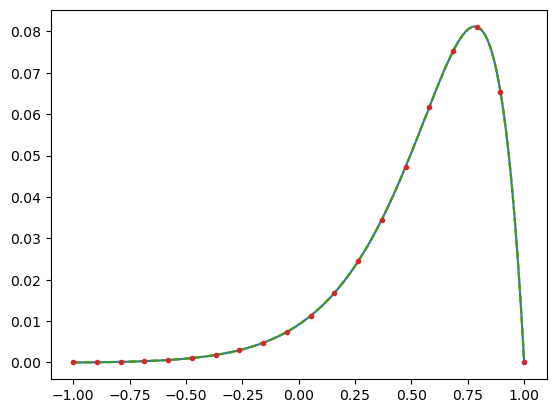

In [16]:
xvals = np.linspace(-1, 1, 200)
xvals_sub = np.linspace(-1, 1, 20)
plt.plot(xvals, solex(xvals))
plt.plot(xvals, solex2(xvals), '--')
plt.plot(xvals, solex3(xvals), '--')
plt.plot(xvals_sub, ex_sol(xvals_sub), '.')
plt.show()

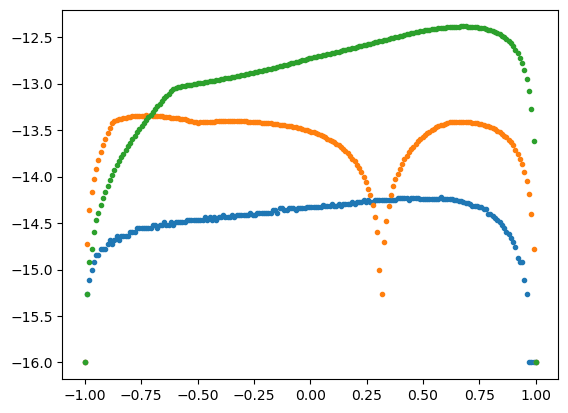

In [17]:
# plt.plot(solex2.domains[:-1], np.log10(error_array), '.')
plt.plot(xvals, np.log10(1e-16 + np.abs(1-(solex(xvals) + 1.)/(ex_sol(xvals)+ 1.))), '.')
plt.plot(xvals, np.log10(1e-16 + np.abs(1-(solex2(xvals) + 1.)/(ex_sol(xvals)+ 1.))), '.')
plt.plot(xvals, np.log10(1e-16 + np.abs(1-(solex3(xvals) + 1.)/(ex_sol(xvals)+ 1.))), '.')

In [182]:
sol1 = solver3(ex_ode, [0, -1], domain = [1, 0.5])
sol11 = solver3(ex_ode, [1, 0], domain = [0.5, 0.])
sol21 = solver3(ex_ode, [0, 1], domain = [0.5, 0.])

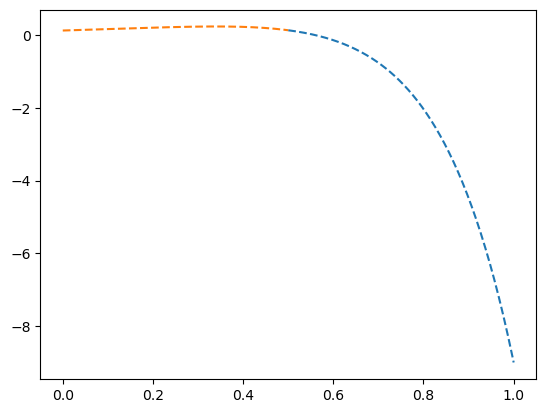

In [186]:
xvals0 = np.linspace(0.5, 1, 200)
plt.plot(xvals0, sol1.deriv().deriv()(xvals0), '--')
xvals1 = np.linspace(0., 0.5, 200)
plt.plot(xvals1, sol1(0.5)*sol11.deriv().deriv()(xvals1) + (sol1.deriv()(0.5))*sol21.deriv().deriv()(xvals1), '--')
plt.show()

In [1]:
import collocode
import numpy as np
import matplotlib.pyplot as plt
import teuk
import swsh

In [2]:
teuksolver = collocode.CollocationODEFixedMultiDomainFixedStepSolver(n=32, chtype=1)
teuksolver2 = collocode.CollocationODEFixedMultiDomainFixedStepSolver(n=64, chtype=1)
teuksolver3 = collocode.CollocationODEMultiDomainFixedStepSolver(n=128, chtype=1)
teuksolver4 = collocode.CollocationODEFixedStepSolver(n=1999, chtype=1)

In [19]:
s = -2
a = 0.1
l = 10
m = 2
omega = m*0.11235955
lam = swsh.swsh_eigenvalue(s, l, m, a*omega)

kappa = np.sqrt(1 - a**2)
ma = m*a

y0 = 1
dy0 = -teuk.u_hbl(0, kappa, s, lam, ma, omega)*y0/teuk.q_hbl(0, kappa, s, ma, omega)
Psi = teuksolver(teuk.teuk_sys, [y0, dy0], args = (kappa, s, lam, ma, omega), domain = [0, 1], subdomains=64)
Psi2 = teuksolver2(teuk.teuk_sys, [y0], args = (kappa, s, lam, ma, omega), domain = [0, 0.25], subdomains=400)
Psi3 = teuksolver3(teuk.teuk_sys, [y0, dy0], args = (kappa, s, lam, ma, omega), domain = [0, 1], subdomains=24, tol = 1e-11)
Psi4 = teuksolver2(teuk.teuk_sys, [y0], args = (kappa, s, lam, ma, omega), domain = [0, 0.25], subdomains=64)
Psi5 = teuksolver4(teuk.teuk_sys, [y0], args = (kappa, s, lam, ma, omega), domain = [0, 1])
Psi6 = teuksolver4(teuk.teuk_sys, [y0, dy0], args = (kappa, s, lam, ma, omega), domain = [0, 1])

ERROR!!!!!!!!!!!!!!!!!!!!!!
ERROR!!!!!!!!!!!!!!!!!!!!!!
ERROR!!!!!!!!!!!!!!!!!!!!!!
ERROR!!!!!!!!!!!!!!!!!!!!!!
ERROR!!!!!!!!!!!!!!!!!!!!!!
ERROR!!!!!!!!!!!!!!!!!!!!!!


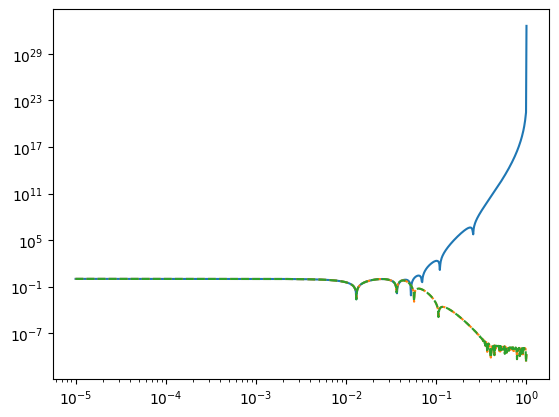

In [20]:
sigmas = np.logspace(np.log10(1e-5), np.log10(1), 1000)
plt.plot(sigmas, np.abs(Psi3(sigmas).real))
plt.plot(sigmas, np.abs(Psi5(sigmas).real), '--')
plt.plot(sigmas, np.abs(Psi6(sigmas).real), '--')
plt.yscale('log')
plt.xscale('log')

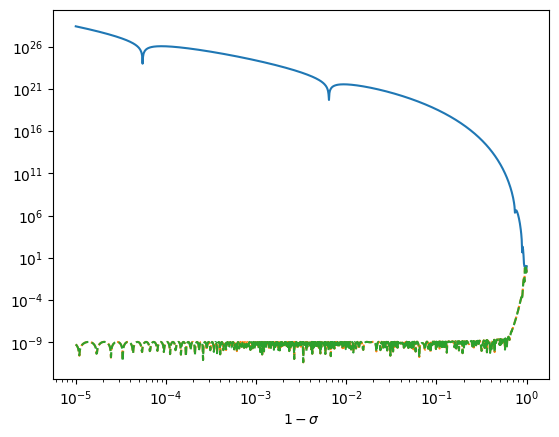

In [21]:
sigmasm1 = np.logspace(np.log10(1e-5), np.log10(1), 1000)
plt.plot(sigmasm1, np.abs(Psi3(1-sigmasm1).real))
plt.plot(sigmasm1, np.abs(Psi5(1-sigmasm1).real), '--')
plt.plot(sigmasm1, np.abs(Psi6(1-sigmasm1).real), '--')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$1-\sigma$')
plt.show()

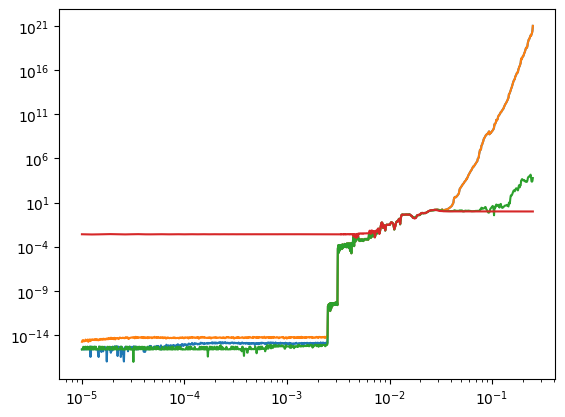

In [47]:
sigmas = np.logspace(np.log10(1e-5), np.log10(0.25), 1000)
plt.plot(sigmas, np.abs(1 - Psi(sigmas)/Psi2(sigmas)))
plt.plot(sigmas, np.abs(1 - Psi3(sigmas)/Psi2(sigmas)))
plt.plot(sigmas, np.abs(1 - Psi4(sigmas)/Psi2(sigmas)))
plt.plot(sigmas, np.abs(1 - Psi5(sigmas)/Psi2(sigmas)))
plt.yscale('log')
plt.xscale('log')
plt.show()

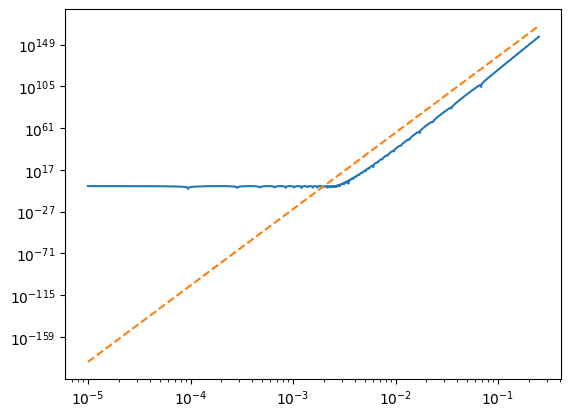

In [5]:
sigmas = np.logspace(np.log10(1e-5), np.log10(0.25), 1000)
plt.plot(sigmas, np.abs(Psi3(sigmas).real))
plt.plot(sigmas, (500*sigmas)**np.sqrt(lam), '--')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [6]:
transformer = collocode.CollocationAlgebra(100)

In [7]:
PsiInt = transformer(Psi3, domain = Psi3.domains[[0,-1]])

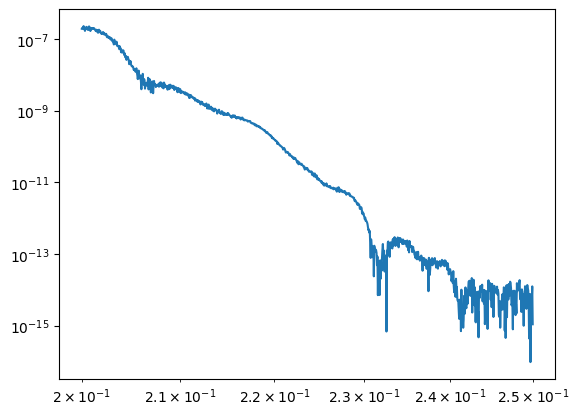

In [8]:
sigmas = np.logspace(np.log10(0.2), np.log10(0.25), 1000)
plt.plot(sigmas, np.abs(1-Psi3(sigmas)/PsiInt(sigmas)))
plt.yscale('log')
plt.xscale('log')
plt.show()

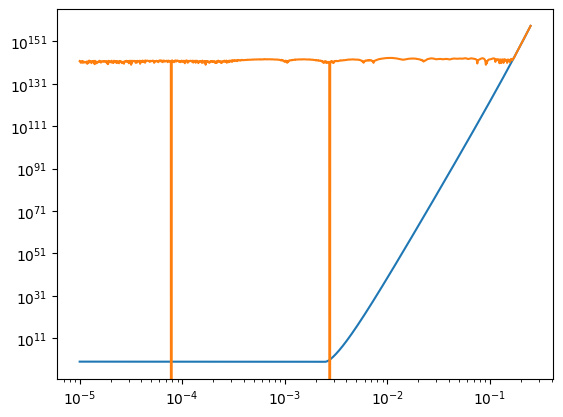

In [9]:
sigmas = np.logspace(np.log10(1e-5), np.log10(0.25), 1000)
plt.plot(sigmas, np.abs(Psi3(sigmas)))
plt.plot(sigmas, np.abs(PsiInt(sigmas)))
plt.yscale('log')
plt.xscale('log')
plt.show()

In [10]:
import kerrgeopy as kg

In [11]:
geo = kg.StableOrbit(0.9, 4., 0., 1.)

### Static modes $m = \omega = 0$

In [50]:
from teuk import HyperboloidalTeukolsky, Delta_sigma
import numpy as np
import matplotlib.pyplot as plt

In [107]:
s = -2
a = 0.9
l = 80
m = 0
omega = m*0.11235955

hbl = HyperboloidalTeukolsky(a, s, l, m, omega, domains=[[0, 0.25], [1, 0.25]])
hbl2 = HyperboloidalTeukolsky(a, -s, l, m, omega, domains=[[0, 0.25], [1, 0.25]])
# hbl.reduce(transformer)

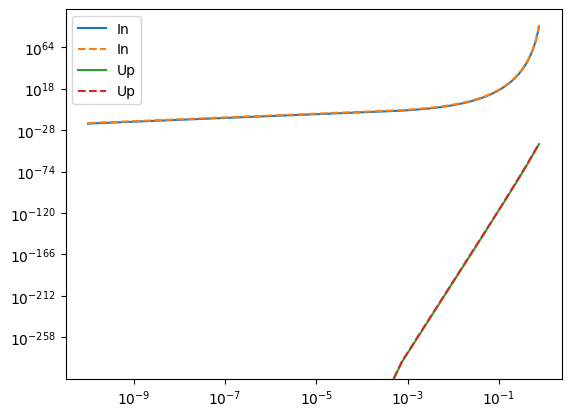

In [108]:
xvalsIn = np.linspace(hbl.psi["In"].domain[0]-1e-10, hbl.psi["In"].domain[1], 1000)[:]
xvalsUp = np.linspace(hbl.psi["Up"].domain[0]+1e-10, hbl.psi["Up"].domain[1], 1000)[:]
Rin0 = hbl.Z_sigma(xvalsIn)*hbl.psi['In'](xvalsIn)
Rin0M = hbl2.Z_sigma(xvalsIn)*hbl2.psi['In'](xvalsIn)/(Delta_sigma(xvalsIn, hbl2.kappa))**(s)
Rup0 = hbl.Z_sigma(xvalsUp)*hbl.psi['Up'](xvalsUp)
Rup0M = hbl2.Z_sigma(xvalsUp)*hbl2.psi['Up'](xvalsUp)/(Delta_sigma(xvalsUp, hbl2.kappa))**(s)
plt.plot(1-xvalsIn, np.abs(Rin0), label = 'In')
plt.plot(1-xvalsIn, np.abs(Rin0M), '--', label = 'In')
plt.plot(1-xvalsIn, np.abs(Rup0), label = 'Up')
plt.plot(1-xvalsIn, np.abs(Rup0M), '--', label = 'Up')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

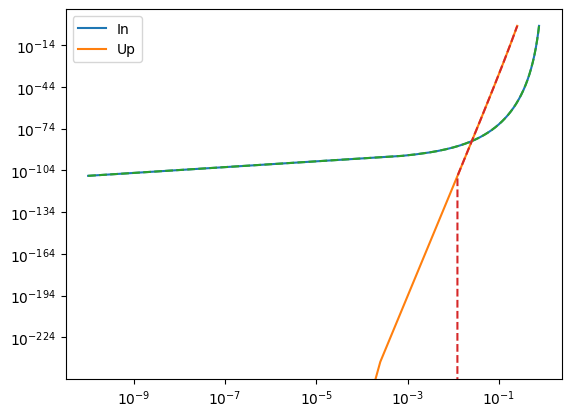

In [45]:
from scipy.special import lpmn, lqmn

xvalsIn = np.linspace(hbl.psi["In"].domain[0]-1e-10, hbl.psi["In"].domain[1], 1000)[:]
xvalsUp = np.linspace(hbl.psi["Up"].domain[0]+1e-10, hbl.psi["Up"].domain[1], 1000)[:]
Rin0 = hbl.Z_sigma(xvalsIn)*hbl.psi['In'](xvalsIn)
Rin0M = hbl2.Z_sigma(xvalsIn)*hbl2.psi['In'](xvalsIn)
Rup0 = hbl.Z_sigma(xvalsUp)*hbl.psi['Up'](xvalsUp)
RinComp = np.array([(z*(1+z))**(-s/2)*lpmn(s, l, 1 + 2*z)[0][np.abs(s), l] for z in 1/xvalsIn-1])
RupComp = np.array([(z*(1+z))**(-s/2)*lqmn(np.abs(s), l, 1 + 2*z)[0][np.abs(s), l] for z in 1/xvalsUp-1])
plt.plot(1-xvalsIn, np.abs(Rin0/Rin0[-1]), label = 'In')
plt.plot(xvalsUp, np.abs(Rup0/Rup0[-1]), label = 'Up')
plt.plot(1-xvalsIn, np.abs(RinComp/RinComp[-1]), '--')
plt.plot(xvalsUp, np.abs(RupComp/RupComp[-1]), '--')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

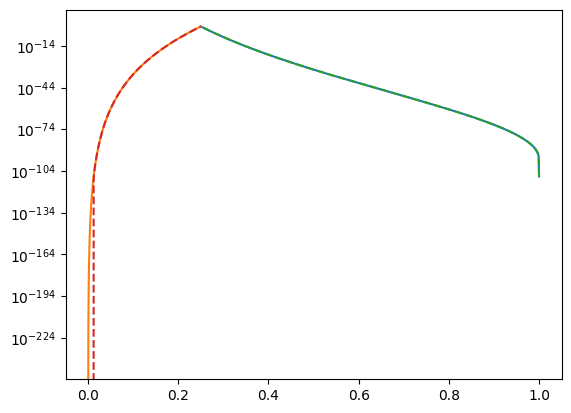

In [11]:
plt.plot(xvalsIn, np.abs(Rin0/Rin0[-1]))
plt.plot(xvalsUp, np.abs(Rup0/Rup0[-1]))
plt.plot(xvalsIn, np.abs(RinComp/RinComp[-1]), '--')
plt.plot(xvalsUp, np.abs(RupComp/RupComp[-1]), '--')
plt.yscale('log')
plt.show()

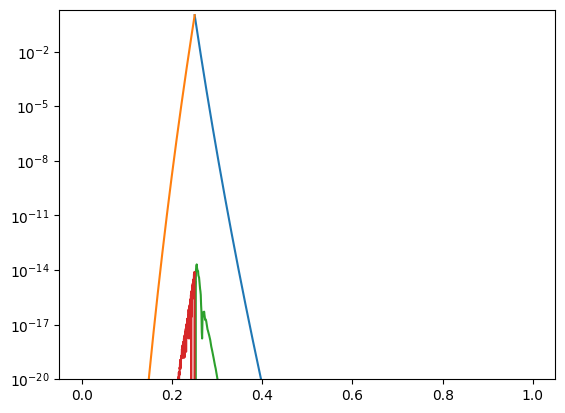

In [12]:
plt.plot(xvalsIn, np.abs(Rin0/Rin0[-1]))
plt.plot(xvalsUp, np.abs(Rup0/Rup0[-1]))
# plt.plot(xvalsIn, np.abs(1-Rin0/Rin0[-1]/(RinComp/RinComp[-1])), '--')
# plt.plot(xvalsUp, np.abs(1-Rup0/Rup0[-1]/(RupComp/RupComp[-1])), '--')
plt.plot(xvalsIn, np.abs(Rin0/Rin0[-1] - (RinComp/RinComp[-1])))
plt.plot(xvalsUp, np.abs(Rup0/Rup0[-1] - (RupComp/RupComp[-1])))
plt.yscale('log')
plt.ylim([1e-20, 2])
plt.show()

### Non-static modes

In [13]:
from teuk import HyperboloidalTeukolsky
import numpy as np
import matplotlib.pyplot as plt

In [14]:
s = 2
a = 0.9
l = 12
m = 12
omega = m*0.11235955

hbl = HyperboloidalTeukolsky(a, s, l, m, omega, domains=[[0, 0.25], [1, 0.25]])
# hbl.reduce(transformer)

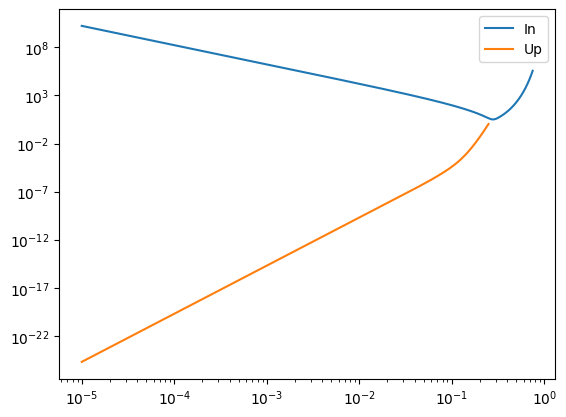

In [15]:
xvalsIn = np.linspace(hbl.psi["In"].domain[0]-1e-5, hbl.psi["In"].domain[1], 1000)[:]
xvalsUp = np.linspace(hbl.psi["Up"].domain[0]+1e-5, hbl.psi["Up"].domain[1], 1000)[:]
Rin0 = hbl.Z_sigma(xvalsIn)*hbl.psi['In'](xvalsIn)
Rup0 = hbl.Z_sigma(xvalsUp)*hbl.psi['Up'](xvalsUp)
plt.plot(1-xvalsIn, np.abs(Rin0), label = 'In')
plt.plot(xvalsUp, np.abs(Rup0), label = 'Up')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

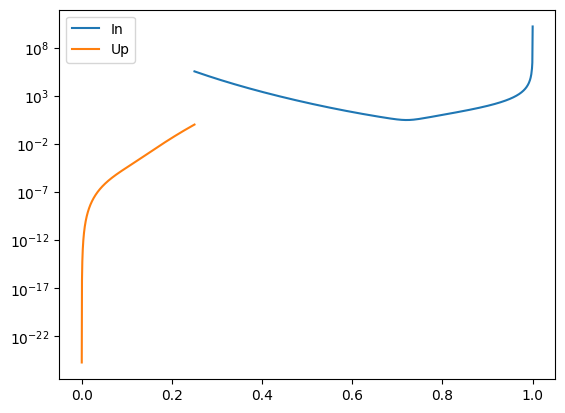

In [16]:
plt.plot(xvalsIn, np.abs(Rin0), label = 'In')
plt.plot(xvalsUp, np.abs(Rup0), label = 'Up')
plt.yscale('log')
plt.legend()
plt.show()

In [1]:
from source import MiniGeo, TeukolskyPointParticleMode
from teuk import sigma_r, r_sigma, sigma_r_deriv_sigma
import numpy as np
import matplotlib.pyplot as plt
import collocode

ImportError: cannot import name 'MiniGeo' from 'source' (/Users/znasipak/Documents/Projects/HyperboloidalTeuk/hbl-teukolsky/source.py)

In [2]:
teuksolver = collocode.CollocationODEMultiDomainFixedStepSolver(n=32, chtype=1)
teuksolver_kwargs = {"subdomains": 150, "tol": 1e-13, "spacing": 'arcsinh7'}

teuksolver2 = collocode.CollocationODEFixedMultiDomainFixedStepSolver(n=64, chtype=1)
teuksolver_kwargs2 = {"subdomains": 400, "spacing": 'arcsinh'}

In [3]:
from pybhpt.teuk import TeukolskyMode
from pybhpt.geo import KerrGeodesic

In [4]:
orbit2 = KerrGeodesic(0.9, 20., 0., 1, nsamples = 2**2)
orbit = MiniGeo(0.9, 20., 0., 1)

In [5]:
teukStatic = TeukolskyPointParticleMode(-2, 70, 2, 0, 0, orbit, solver = teuksolver, solver_kwargs = teuksolver_kwargs, integrate_kwargs = {"nsamples": 2**2})
teukStaticComp = TeukolskyPointParticleMode(-2, 70, 0, 0, 0, orbit, solver = teuksolver, solver_kwargs = teuksolver_kwargs, integrate_kwargs = {"nsamples": 2**2})

In [21]:
teukStatic

NameError: name 'teukStatic' is not defined

In [6]:
%timeit teukStatic = TeukolskyPointParticleMode(-2, 70, 2, 0, 0, orbit, solver = teuksolver, solver_kwargs = teuksolver_kwargs, integrate_kwargs = {"nsamples": 2**2})

361 ms ± 25.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
teukZN = TeukolskyMode(-2, 60, 60, 0, 0, orbit2)
teukZN.solve(orbit2)
teuk60 = TeukolskyPointParticleMode(-2, 60, 60, 0, 0, orbit, solver = teuksolver, solver_kwargs = teuksolver_kwargs, integrate_kwargs = {"nsamples": 2**2})
teuk602 = TeukolskyPointParticleMode(-2, 60, 60, 0, 0, orbit, solver = teuksolver2, solver_kwargs = teuksolver_kwargs2, integrate_kwargs = {"nsamples": 2**2})

In [9]:
teuktest = TeukolskyPointParticleMode(-2, 80, -80, 0, 0, orbit, solver = teuksolver, solver_kwargs = teuksolver_kwargs, integrate_kwargs = {"nsamples": 2**2})

In [10]:
from spheroidal import Ylm

In [12]:
# %%timeit
teuksolver_kwargs = {"subdomains": 140, "tol": 1e-13, "spacing": 'arcsinh7'}
teukList = []
teuk0 = TeukolskyPointParticleMode(-2, 80, 1, 0, 0, orbit, solver = teuksolver, solver_kwargs = teuksolver_kwargs, integrate_kwargs = {"nsamples": 2**2})
teukList.append(teuk0)
teuksolver2 = collocode.CollocationODEFixedMultiDomainFixedStepSolver(n=32, chtype=1)
teuksolver_kwargs2 = {"subdomains": teuk0.domains}
for l in range(40, 1, -1):
    print(l)
    for m in range(-l, l+1):
        teukList.append(TeukolskyPointParticleMode(-2, l, m, 0, 0, orbit, solver = teuksolver2, solver_kwargs = teuksolver_kwargs2, integrate_kwargs = {"nsamples": 2**2}))

40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2


In [10]:
teukZN.amplitude('Up'), teuk60.amplitude["Up"], teuk602.amplitude["Up"], teukZN.amplitude('In'), teuk60.amplitude["In"]

((1.4114860893801364e-35+1.9460634686292824e-34j),
 (1.4114860880571403e-35+1.946063468587713e-34j),
 (1.4114860909185536e-35+1.946063469576351e-34j),
 (-2.618915308602806e-72+4.47601385712135e-73j),
 (-2.618915308601996e-72+4.476013857125176e-73j))

In [13]:
sp = sigma_r(orbit.p, teuk60.kappa)
print(1-teukZN.homogeneousradialsolution('Up', 0)/teuk60.homogeneousradialsolution('Up', sp))
print(1-teukZN.homogeneousradialsolution('In', 0)/teuk60.homogeneousradialsolution('In', sp))
print(1-teukZN.homogeneousradialderivative('Up', 0)/teuk60.homogeneousradialderivative('Up', sp)/sigma_r_deriv_sigma(sp, teuk60.kappa))
print(1-teukZN.homogeneousradialderivative('In', 0)/teuk60.homogeneousradialderivative('In', sp)/sigma_r_deriv_sigma(sp, teuk60.kappa))

(2.6160296151545026e-11-6.608752443634374e-11j)
(2.822186928597148e-13+1.9270722386347414e-13j)
(2.6160740240754876e-11-6.608788228711248e-11j)
(2.8532731732866523e-13+1.9445101287320373e-13j)


# Generator Rewrite

In [2]:
%reload_ext autoreload
%autoreload 2

In [46]:
import collocode
from mode import TeukolskyPointParticleModeGenerator, TeukolskyPointParticleModeGridGenerator
from hertz import HertzPointParticleModeGridGenerator
from geo import MiniGeo
import numpy as np
import matplotlib.pyplot as plt

In [47]:
orbit = MiniGeo(0.9, 10., 0., 1)

In [48]:
solver = collocode.CollocationODEMultiDomainFixedStepSolver(n=32, chtype=1)
solver_kwargs = {"subdomains": 50, "tol": 1e-13, "spacing": 'arcsinh7'}
teuk_gen = TeukolskyPointParticleModeGenerator(orbit, solver, solver_kwargs)

In [49]:
lmax_value = 50

In [50]:
# teuk_grid_gen = TeukolskyPointParticleModeGridGenerator(orbit, solver=solver)
# teuk_grid_gen.optimize(-2, lmax_value, solver=solver, solver_kwargs = solver_kwargs)

In [51]:
hertz_grid_gen = HertzPointParticleModeGridGenerator(orbit, solver=solver, solver_kwargs = solver_kwargs)
hertz_grid_gen.optimize(-2, lmax_value, solver=solver, solver_kwargs = solver_kwargs)

In [52]:
Phi = hertz_grid_gen(-2, [2, lmax_value], gauge='IRG')
PhiY = hertz_grid_gen.cast_to_spherical(Phi, lmax_value - 5)

In [10]:
from metric import MetricReconstructor

In [35]:
hab_gen = MetricReconstructor(PhiY)

In [83]:
h22 = {}
h24 = {}
h44 = {}
h22lm = {}
h24lm = {}
h44lm = {}
for l in range(0, 22):
    for m in range(-l, l+1):
        h22lm[(l,m)] = 0.
        h24lm[(l,m)] = 0.
        h44lm[(l,m)] = 0.
        lpmin = np.max([abs(m), l - 7])
        for lp in range(lpmin, l + 7):
            h22lm[(l,m)] += hab_gen.h22_coupling(l, m, lp)
            h24lm[(l,m)] += hab_gen.h24_coupling(l, m, lp)
            h44lm[(l,m)] += hab_gen.h44_coupling(l, m, lp)

In [581]:
from swsh import sphericalY_expansion as Yslm
from metric import spin_zero_to_s_coupling
from teuk import FrequencyDomainModeHyperboloidalSlicing, ScaledTeukolskyFrequencyDomainModeHyperboloidalSlicingRadialCompactification


h22 = {}
h24 = {}
h44 = {}
for j in range(0, 20):
    for m in range(-j, j+1):
        h22[j] = 0.
        h24[j] = 0.
        h44[j] = 0.

sp = np.array([sigma_r(PhiY.source.p, PhiY.kappa)])
hpref = metric_scalings_IRG(PhiY.kappa, sp)
for l in range(0, 22):
    for m in range(-l, l+1):
        for j in range(abs(m), 20):
            Zhbl = FrequencyDomainModeHyperboloidalSlicing(PhiY.a, m, m*PhiY.source.frequencies[-1])
            Ylm = Yslm(0, j, m, 0.)*Zhbl.Z_slicing(sp)
            h22[j] += spin_zero_to_s_coupling(0, j, l, m)*hab_gen.extract_chebyshev_coefficients(h22lm[(l,m)])["Up"](sp)*Ylm
            h24[j] += spin_zero_to_s_coupling(-1, j, l, m)*hab_gen.extract_chebyshev_coefficients(h24lm[(l,m)])["Up"](sp)*Ylm
            h44[j] += spin_zero_to_s_coupling(-2, j, l, m)*hab_gen.extract_chebyshev_coefficients(h44lm[(l,m)])["Up"](sp)*Ylm

In [582]:
Zm = ScaledTeukolskyFrequencyDomainModeHyperboloidalSlicingRadialCompactification(PhiY.a, -2, -1, -1*PhiY.source.frequencies[-1])
Zp = ScaledTeukolskyFrequencyDomainModeHyperboloidalSlicingRadialCompactification(PhiY.a, -2, 1, 1*PhiY.source.frequencies[-1])
Zm.Z_sigma(sp)*PhiY.Rslm["Up"](sp)[:, PhiY.mode_index(3,-1)], Zp.Z_sigma(sp)*PhiY.Rslm["Up"](sp)[:, PhiY.mode_index(3,1)]

(array([0.90721518+0.15684854j]), array([-0.90721518+0.15684854j]))

In [583]:
hpref = metric_scalings_IRG(PhiY.kappa, sp)
hhbl = FrequencyDomainModeHyperboloidalSlicing(PhiY.source.a, -1, -1.*PhiY.source.frequencies[-1])
print(hpref[1,1]*hab_gen.extract_chebyshev_coefficients(hab_gen.h22_coupling(3,-1,3))["Up"](sp)*hhbl.Z_slicing(sp))
hhbl = FrequencyDomainModeHyperboloidalSlicing(PhiY.source.a, 1, 1.*PhiY.source.frequencies[-1])
print(hpref[1,1]*hab_gen.extract_chebyshev_coefficients(hab_gen.h22_coupling(3,1,3))["Up"](sp)*hhbl.Z_slicing(sp))

[-246.94260897-38.85538256j]
[246.94260897-38.85538256j]


In [584]:
from metric import huu, huu_reg, metric_scalings_IRG
from teuk import sigma_r

h22_array = np.array([h22[l] for l in range(0, 20)])
h24_array = np.array([h24[l] for l in range(0, 20)])
h44_array = np.array([h44[l] for l in range(0, 20)])

In [585]:
hab_gen.extract_chebyshev_coefficients(h22lm[(3,-1)])["Up"](sp)*scalings[1,1,0], hab_gen.extract_chebyshev_coefficients(h22lm[(3,1)])["Up"](sp)*scalings[1,1,0]

(array([-220.68882712-114.74530636j]), array([220.68882712-114.74530636j]))

In [586]:
h22[1]*hpref[1,1]

array([-9.57122384+1.64820426e-15j])

In [587]:
s_val = sigma_r(np.array([10., 12.]), hab_gen.kappa)
s_val_in = sigma_r(np.array([8., 10.]), hab_gen.kappa)
scalings = metric_scalings_IRG(hab_gen.kappa, s_val)
scalings_in = metric_scalings_IRG(hab_gen.kappa, s_val_in)
h22_22 = hab_gen.extract_chebyshev_coefficients(h22lm[(20,4)])
h24_22 = hab_gen.extract_chebyshev_coefficients(h24lm[(2,2)])
h44_22 = hab_gen.extract_chebyshev_coefficients(h44lm[(2,2)])

In [588]:
from teuk import ScaledTeukolskyFrequencyDomainModeHyperboloidalSlicingRadialCompactification
Zm = ScaledTeukolskyFrequencyDomainModeHyperboloidalSlicingRadialCompactification(PhiY.source.a, -2, -3, -3.*PhiY.source.frequencies[-1])
Zp = ScaledTeukolskyFrequencyDomainModeHyperboloidalSlicingRadialCompactification(PhiY.source.a, -2, 3, 3.*PhiY.source.frequencies[-1])

In [589]:
Zm.Z_sigma(sp)*PhiY.Rslm["Up"](sp)[:, PhiY.mode_index(5,-3)], Zp.Z_sigma(sp)*PhiY.Rslm["Up"](sp)[:, PhiY.mode_index(5,3)]

(array([0.22616076+0.07071584j]), array([-0.22616076+0.07071584j]))

In [590]:
np.abs(h22_22["In"](s_val_in)*scalings_in[1,1]), np.abs(h22_22["Up"](s_val)*scalings[1,1])

(array([ 0.10485535, 42.38617447]), array([42.44958415,  1.37905851]))

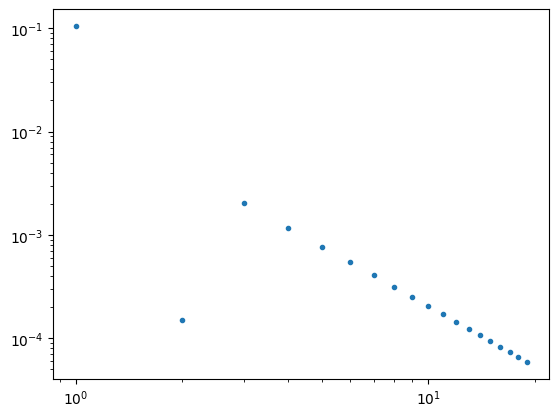

In [605]:
plt.plot(np.abs(4*huu(PhiY.source, sp, 0., h22_array, h24_array, h44_array) - huu_reg(PhiY.source)), '.')
plt.yscale('log')
plt.xscale('log')

In [594]:
huu_reg(PhiY.source)

0.09698449337094588

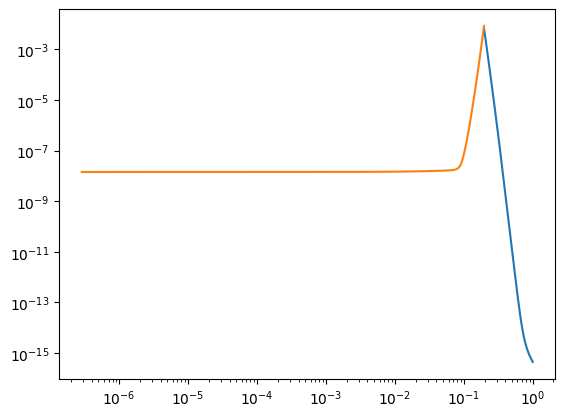

In [36]:
sigmaIn = multi_domain_chebyshev_nodes(32, Phi.Rslm["In"].domains).flatten()
sigmaUp = multi_domain_chebyshev_nodes(32, Phi.Rslm["Up"].domains).flatten()
plt.plot(sigmaIn, np.abs(PhiY.Rslm["In"](sigmaIn, deriv = 1))[:, PhiY.mode_index(20, -20)])
plt.plot(sigmaUp, np.abs(PhiY.Rslm["Up"](sigmaUp, deriv = 1))[:, PhiY.mode_index(20, -20)])
plt.yscale('log')
plt.xscale('log')
plt.show()

## Test metric reconstruction coupling

In [74]:
from metric import metric_ab_modes
import numpy as np

In [61]:
from metric import MetricReconstructor
hab_gen = MetricReconstructor(PhiY)

In [77]:
for m in range(-18, 19):
    h22m=metric_ab_modes(hab_gen.kappa, hab_gen.pts, m, hab_gen.frequency, [PhiY.group_by_m_modes(hab_gen.PhiRslm[0].T)[m], PhiY.group_by_m_modes(hab_gen.PhiRslm[1].T)[m], PhiY.group_by_m_modes(hab_gen.PhiRslm[2].T)[m]])

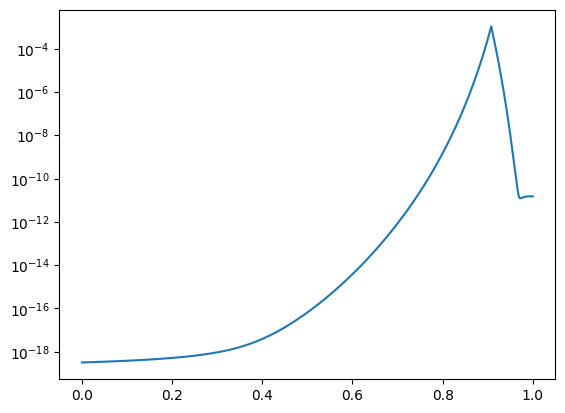

In [78]:
import matplotlib.pyplot as plt
plt.plot(1-hab_gen.pts, np.abs(h22m[0][0]))
# plt.plot(1-hab_gen.pts, np.abs(h24lm[(18,2)]), '--')
plt.yscale('log')

In [96]:
from scipy.interpolate import CubicSpline as CSpline

In [105]:
coeff_iter = 0
phasesFull = np.unwrap(phases[:, coeff_iter])
ampsHalf0 = np.log(amps)[:, coeff_iter][1:-1][::2]
ampsHalf1 = np.log(amps)[:, coeff_iter][::2]
lmodesHalf0 = lmodes[1:-1][::2]
lmodesHalf1 = lmodes[::2]
phasesHalf0 = phasesFull[1:-1][::2]
phasesHalf1 = phasesFull[::2]

In [122]:
# %%timeit
phases0=CSpline(lmodes[:-3], phasesFull[:-3])
amps0=CSpline(lmodesHalf0[:-2], ampsHalf0[:-2])
amps1=CSpline(lmodesHalf1[:-2], ampsHalf1[:-2])
test0 = np.exp(amps0(lmodesHalf0[-1]))*np.exp(1j*phases0(lmodesHalf0[-1]))
test0_comp = np.exp(ampsHalf0[-1])*np.exp(1j*phasesHalf0[-1])
print(test0, test0_comp, np.abs(1-test0/test0_comp))
test1 = np.exp(amps1(lmodesHalf1[-1]))*np.exp(1j*phases0(lmodesHalf1[-1]))
test1_comp = np.exp(ampsHalf1[-1])*np.exp(1j*phasesHalf1[-1])
print(test1, test1_comp, np.abs(1-test1/test1_comp))

(5.55278338644921e-25+3.5504948255041615e-25j) (5.479500545821403e-25+3.5110018254830087e-25j) 0.012791798116523768
(5.077390254859175e-26+3.685745644446774e-26j) (5.026130509176568e-26+3.6665419126120524e-26j) 0.00879851660222478


In [108]:
from bhpwave.spline import CubicSpline

In [121]:
%%timeit
phases0=CubicSpline(lmodes[8:-3], phasesFull[8:-3], bc='not-a-knot')
amps0=CubicSpline(lmodesHalf0[4:-2], ampsHalf0[4:-2], bc='E(3)')
amps1=CubicSpline(lmodesHalf1[4:-2], ampsHalf1[4:-2], bc='not-a-knot')
test0 = np.exp(amps0(lmodesHalf0[-1]))*np.exp(1j*phases0(lmodesHalf0[-1]))
test0_comp = np.exp(ampsHalf0[-1])*np.exp(1j*phasesHalf0[-1])
#print(test0, test0_comp, np.abs(1-test0/test0_comp))
test1 = np.exp(amps1(lmodesHalf1[-1]))*np.exp(1j*phases0(lmodesHalf1[-1]))
test1_comp = np.exp(ampsHalf1[-1])*np.exp(1j*phasesHalf1[-1])
#print(test1, test1_comp, np.abs(1-test1/test1_comp))

181 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [72]:
np.array([psi4.coupling[psi4.mode_index(l, 20)] for l in range(20, 31)]).T[9]

array([ 2.61086743e-14,  1.93590663e-12,  9.26389323e-11,  4.18903361e-09,
        1.33872709e-07,  4.81991205e-06,  1.05433307e-04,  3.20781138e-03,
        3.83351937e-02,  9.98525565e-01, -3.82532396e-02])

In [11]:
from teuk import teukolsky_starobinsky_complex_constant

In [57]:
from pybhpt.geo import KerrGeodesic
from pybhpt.teuk import TeukolskyMode
from pybhpt.hertz import HertzMode

In [58]:
geo = KerrGeodesic(0.9, 20., 0., 1)
teuk = TeukolskyMode(-2, 20, 2, 0, 0, geo)
teuk.solve(geo)
Psi = HertzMode(teuk, "IRG")
Psi.solve()

In [59]:
Psi.amplitudes, teuk.amplitude('Up')

({'In': (2.6134183783940577e-40+6.6044371842270526e-40j),
  'Up': (-2.308953377599769e-40+6.213027970706677e-41j)},
 (-5.065082177621914e-36+1.3629251978690675e-36j))

# Scratch

In [14]:
bc_test = 'Up'
sigmasUP = np.linspace(*teuk.Rslm.psi[bc_test].domain, 1000)
sigmas = sigmasUP
combo2plus60_UP = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test](sigmas) + teuk60.amplitude[bc_test]*teuk60.Rslm.psi[bc_test](sigmas)
combo2times60_UP = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test](sigmas)*teuk60.amplitude[bc_test]*teuk60.Rslm.psi[bc_test](sigmas)
combo2times2_UP = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test](sigmas)*teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test](sigmas)

bc_test = 'In'
sigmasIN = np.linspace(*teuk.Rslm.psi[bc_test].domain, 1000)
sigmas = sigmasIN
combo2plus60_IN = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test](sigmas) + teuk60.amplitude[bc_test]*teuk60.Rslm.psi[bc_test](sigmas)
combo2times60_IN = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test](sigmas)*teuk60.amplitude[bc_test]*teuk60.Rslm.psi[bc_test](sigmas)
combo2times2_IN = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test](sigmas)*teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test](sigmas)


teuk.Rslm.reduce(n=120)
teuk60.Rslm.reduce(n=120)

bc_test = 'Up'
sigmas = sigmasUP
test = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test] + teuk60.amplitude[bc_test]*teuk60.Rslm.psi[bc_test]
combo2plus60_UP_comp = test(sigmas)
test = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test]*teuk60.amplitude[bc_test]*teuk60.Rslm.psi[bc_test]
combo2times60_UP_comp = test(sigmas)
test = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test]*teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test]
combo2times2_UP_comp = test(sigmas)

bc_test = 'In'
sigmas = sigmasIN
test = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test] + teuk60.amplitude[bc_test]*teuk60.Rslm.psi[bc_test]
combo2plus60_IN_comp = test(sigmas)
test = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test]*teuk60.amplitude[bc_test]*teuk60.Rslm.psi[bc_test]
combo2times60_IN_comp = test(sigmas)
test = teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test]*teuk.amplitude[bc_test]*teuk.Rslm.psi[bc_test]
combo2times2_IN_comp = test(sigmas)

NameError: name 'teuk' is not defined

/Users/znasipak/Documents/Projects/HyperboloidalTeuk/hbl-teukolsky/teuk.py:50: RuntimeWarning: divide by zero encountered in divide
  return 1. - kappa + 2.*kappa/sigma


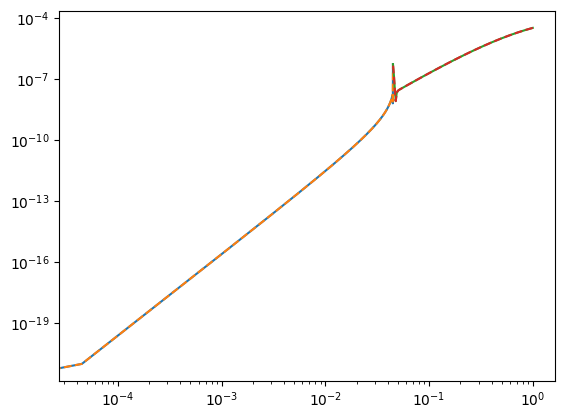

In [136]:
rhoUP = r_sigma(sigmasUP, teuk.kappa)**(-4)
rhoIN = r_sigma(sigmasIN, teuk.kappa)**(-4)
plt.plot(sigmasUP, rhoUP*np.abs(combo2plus60_IN))
plt.plot(sigmasUP, rhoUP*np.abs(combo2plus60_IN_comp), '--')
plt.plot(sigmasIN, rhoIN*np.abs(combo2plus60_IN))
plt.plot(sigmasIN, rhoIN*np.abs(combo2plus60_IN_comp), '--')
plt.yscale('log')
plt.xscale('log')
plt.show()

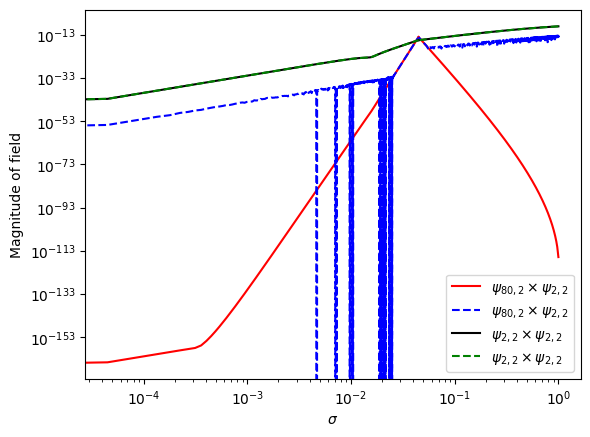

In [137]:
rhoUP = r_sigma(sigmasUP, teuk.kappa)**(-4)
rhoIN = r_sigma(sigmasIN, teuk.kappa)**(-4)
plt.plot(sigmasUP, rhoUP**2*np.abs(combo2times60_UP), 'r-', label = "$\psi_{80,2} \\times \psi_{2,2}$")
plt.plot(sigmasUP, rhoUP**2*np.abs(combo2times60_UP_comp), 'b--', label = "$\psi_{80,2} \\times \psi_{2,2}$")
plt.plot(sigmasIN, rhoIN**2*np.abs(combo2times60_IN), 'r-')
plt.plot(sigmasIN, rhoIN**2*np.abs(combo2times60_IN_comp), 'b--')
plt.plot(sigmasIN, rhoIN**2*np.abs(combo2times2_IN), '-', color = 'black', label = "$\psi_{2,2} \\times \psi_{2,2}$")
plt.plot(sigmasIN, rhoIN**2*np.abs(combo2times2_IN_comp), '--', color = 'green', label = "$\psi_{2,2} \\times \psi_{2,2}$")
plt.plot(sigmasUP, rhoUP**2*np.abs(combo2times2_UP), '-', color = 'black')
plt.plot(sigmasUP, rhoUP**2*np.abs(combo2times2_UP_comp), '--', color = 'green')
plt.yscale('log')
plt.xscale('log')
# plt.ylim([1e-36,1e3])
plt.legend()
plt.ylabel("Magnitude of field")
plt.xlabel("$\sigma$")
plt.show()